# A Particular Sequence

## Introduction

In mathematics, a sequence is defined as an ordered and indexed list of elements or terms. Formally, the specific ordering and index of each element is defined by a function of each element's position.

Depending on the function definition, sequences can either be finite, meaning it has a specific number of elements, or it can be infinite, meaning it continues indefinitely.

If you have ever encountered the famous Fibonacci sequence, you might already know that this is an example of an infinite series. The Fibonacci sequence and its function definition is as follows:

$$
\begin{align}
    a_0 &= 1, \ a_1 = 1 \\
    a_n &= \{a_{n-2} + a_{n-1}\}^\infty_{n=2} \\
    S   &= \{1,1,2,3,5,8,13,...\}
\end{align}
$$

You will notice that each number is the sum of the previous two numbers in the sequence, $S$. Now, let's say we wanted to turn this infinite series into a finite series of the first seven terms, all we need to do is to change the function definition:

$$
\begin{align}
    a_n &= \{a_{n-2} + a_{n-1}\}^6_{n=2} \\
    S_6 &=\{1,1,2,3,5,8,13\}
\end{align}
$$

Lastly, let's divide consecutive terms by each other starting from the fourth term to see what we get:

$$
\begin{align}
    3 \div 5 &= 0.6 \\
    5 \div 8 &= 0.625 \\
    8 \div 13 &= 0.61538...
\end{align}
$$

If we continue on, we will observe that we approach another famous result called the Golden ratio, which is approximately $\phi = 1.618...$! 

From the number of petals on a flower to the pattern of spirals in shells, the Fibonacci sequence and the golden ratio appears in the everyday world around us including a variety of disciplines. Though this sequence is not the focus of this report, you are most welcome to explore it further and hopefully can come to appreciate the importance of exploring the mathematical properties and applications of sequences in general.

In this report, the aim is to explore properties such as length and the highest number reached of the following finite sequence defined below:

$$
f(x) = 
\begin{cases}
    \frac{x}{2}, \; & \text{if $x$ is even}\\ 
    3x+1, & \text{if $x$ is odd}
\end{cases}
$$

with $a_1=k$, where $k$ is a positive integer. For each $k$, we will get a sequence for which the elements are determined by $a_n = f(a_{n-1})$ for $n>1$. Lastly, the final condition is that this sequence terminates when $a_n = 1$, otherwise the elements $\{1,4,2\}$ will be repeated indefinitely for every sequence generated. Additionally, $k$ will also be the first element in its corresponding sequence.

The plan of this project is to first be able to generate the full finite sequence of a particular $k$ value using Python functions. From there we can study upwards of tens of thousands (if computing power permits) of finite sequences and create plots to visualize how the length and highest number reached of these finite sequences vary as a function of their corresponding $k$ value. In terms of length of the sequences, we will see if the plot behavior changes if we only use sequences generated by prime $k$ starting values and for the highest numbers reached, we will identify if observations in our plot are generated by patterns hidden in the $k$ values themselves.

## Sequence Generator

As the title of this section implies, we will attempt to create several Python functions that can help us generate the corresponding finite sequence for a given $k \in \mathbb{N}$ whilst satisfying the definition of our sequence.

We shall first consider how we can compute the next element of the finite sequence starting at the given integer $k$. To achieve this we define a function `single_step` that does exactly that.

In [162]:
def single_step(x):
    if x%2 == 0:
        return x//2
    else:
        return 3*x+1

Now using this function we can obtain the next element of any sequence. For instance, for $k=6$ the next element in the sequence is $3$ (verify using the definition of our finite sequence).

In [163]:
single_step(6)

3

What about the rest of the sequence? The function `full_sequence` will return the full finite sequence starting from $k$ until the sequence reaches $1$ at which point it terminates, just as we desired.

In [164]:
def full_sequence(k):
    sequence = []
    sequence.append(k)
    # append the next element of the sequence to the `sequence` list until it reaches 1
    i = 0
    while sequence[i] != 1:
        sequence.append(single_step(sequence[i]))
        i += 1
    return sequence

For instance, the full sequence for $k=6$ is given below.

In [165]:
full_sequence(6)

[6, 3, 10, 5, 16, 8, 4, 2, 1]

Fantastic! We can now move on to see if this sequence has any interesting properties or patterns.

## Sequence Properties and Patterns

Trying to find the properties of sequences requires robust data analysis techniques. Oftentimes, you will not know what patterns to look for until you stumble across one after some experimentation. We will create functions that will allow us to analyze the lengths and highest number reached for many values of $k$. In addition, there will be a discussion on the termination of all the finite sequences.

### Sequence Length

The function `sequence_length` returns a list called `lengths`, which contains an ordered list of lengths of each finite sequence for given values of $k$.

In [166]:
def sequence_lengths(k):
    lengths = []
    for i in range(1, k+1): # append the length of each finite sequence to the `lengths` list
        lengths.append(len(full_sequence(i)))
    return lengths

In [218]:
# to be used in the table and plot below, also to hide list output
tp_lengths = sequence_lengths(10000)

Here are the lengths for the finite sequences generated for $k=1$ to $10$.

In [219]:
print(' k  length')
print('--- ------')
for i in range(10): # generate a table of lengths of a finite sequence corresponding to a k value
    print('{:2}  {:4}'.format(i+1, tp_lengths[i]))

 k  length
--- ------
 1     1
 2     2
 3     8
 4     3
 5     6
 6     9
 7    17
 8     4
 9    20
10     7


Using the `length` list and the values for $k$, which we used to generate the finite sequences, we can plot the lengths of the finite sequences as a function of $k$ for $k=1$ to $10000$. 

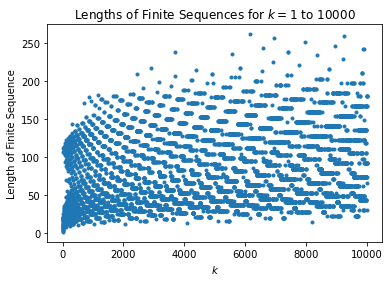

In [221]:
import matplotlib.pyplot as plt

x = [i for i in range(1, len(tp_lengths)+1)] # create interval from k=1 to the length of the `tp_lengths` list
y = tp_lengths

# plot the length of each finite sequence as a function of k
plt.plot(x,y,'.')
plt.title('Lengths of Finite Sequences for $k=1$ to $10000$')
plt.xlabel('$k$')
plt.ylabel('Length of Finite Sequence')

plt.show() # hides unnecesary output

The plot above shows a spread of points that are forming striations or exponentially decaying curved lines whereby the gaps between them are increasing as $k$ increases.

#### Sequence Lengths of Prime $k$ Starting Values

Let's take this a step further and observe how the plot changes if we observe only the sequences corresponding to prime $k$ starting values. We'll start by reworking our function `sequence_lengths` into a new function that only returns sequence lengths of those generated from prime $k$ values and we'll call it `prime_sequence_lengths`.

First we need a way of checking if a number is prime, to do this we will use the `is_prime` function.

In [340]:
def is_prime(n): # This function determines if the integer n is prime
    if n > 1: # Returns false for when n = 1
        for d in range(2,n//2+1): # Loop through valid divisors
            if n%d == 0: # Check if d divides n
                return False
        return True # If we get through the loop, then the number must be prime.
    else:
        return False

In [344]:
def prime_sequence_lengths(k):
    lengths = []
    for i in range(1, k+1): # append the length of each finite sequence to the `lengths` list
        if is_prime(i) == True:
            lengths.append(len(full_sequence(i)))
    return lengths

Ask you can see below our function seems to be functioning properly as we know $2$, $3$, $5$, and $7$ are the only prime numbers greater than or equal to $10$.

In [348]:
prime_sequence_lengths(10)

[2, 8, 6, 17]

Now let's plot only the finite sequences corresponding to prime $k$ values!

In [350]:
# to be used in plot below and to hide list output
prime_lengths = prime_sequence_lengths(10000)

We can use the `prime_lengths` list and the prime values for $k$ to plot the lengths of the finite sequences as a function of prime $k$ values between $k=1$ and $10000$. 

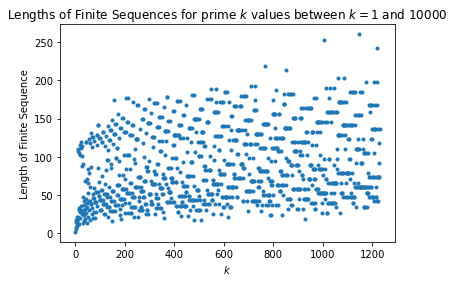

In [353]:
m = [i for i in range(1, len(prime_lengths)+1)] # create interval from k=1 to the length of the `prime_lengths` list
n = prime_lengths

# plot the length of each finite sequence as a function of k
plt.plot(m,n,'.')
plt.title('Lengths of Finite Sequences for prime $k$ values between $k=1$ and $10000$')
plt.xlabel('$k$')
plt.ylabel('Length of Finite Sequence')

plt.show() # hides unnecesary output

We do still observe the exponentially decaying striations, which is quite interesting, though it seems that it is not merely caused by prime $k$ starting values since there are certainly more $k$ values contributing to the points on each curve from the plot we generated before.

### Highest Number Reached

Similar to above, the function `sequence_maximum` returns a list called `maxima`, which contains an ordered list of lengths of each finite sequence for given values of $k$.

In [193]:
def sequence_maximum(k):
    maxima = []
    for i in range(1, k+1): # append the highest # of each finite sequence to the `maxima` list
        maxima.append(max(full_sequence(i)))
    return maxima

In [215]:
# to be used in the table & plot (tp) below, also to hide list output
tp_maxima = sequence_maximum(200)

Below is a table of the highest numbers reached by the finite sequences for $k=1$ to $10$.

In [216]:
print(' k  highest #')
print('--- ---------')
for i in range(10): # generate a table of highest # reached of a finite sequence corresponding to a k value from k=1 to 10
    print('{:2}  {:5}'.format(i+1, tp_maxima[i]))

 k  highest #
--- ---------
 1      1
 2      2
 3     16
 4      4
 5     16
 6     16
 7     52
 8      8
 9     52
10     16


Using the `maxima` list and the values for $k$, which we used to generate the finite sequences, we can plot the lengths of the finite sequences as a function of $k$ for $k=1$ to $200$. 

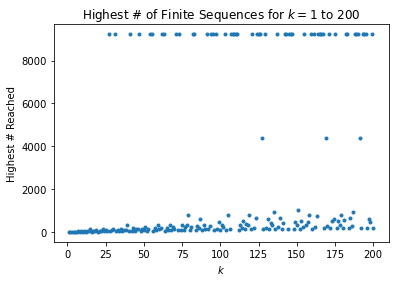

In [217]:
j = [i for i in range(1, len(tp_maxima)+1)] # create interval from k=1 to length of the `tp_maxima` list
k = tp_maxima

# plot the highest # reached of each finite sequence as a function of k
plt.plot(j,k,'.')
plt.title('Highest # of Finite Sequences for $k=1$ to $200$')
plt.xlabel('$k$')
plt.ylabel('Highest # Reached')

plt.show() # hides unnecesary output

The plot above depicts two distinct bands separated by large gaps on the y-axis. There is a semi-consistent range of values for the highest number reached by certain arbritary values of $k$, which is apparent by the bands.

#### Identifying Patterns in $k$ Values

Let's make an attempt to identify what the most frequent highest number reached is. To do this, we will utilize the function `Counter` (returns the frequency of all elements in a list) and the method `most_common` (returns a list of the most common elements) from a library called `collections`. We will identify the five most common highest numbers reached within our finite sequences.

In [292]:
from collections import Counter
# .most_common(n) method will select the top n most common elements from the Counter() function
Counter(tp_maxima).most_common(5)

[(9232, 51), (160, 13), (52, 12), (304, 10), (88, 8)]

It appears that approximately $25\%$ of all our k-values generate a finite sequence of with the highest number reached being $9232$. This seems to correspond to the uppermost band of data points on our plot. Why does there seem to be a ceiling for how high the highest number of the finite sequences can be for the range of k values we have selected? Is there something special about these particular k-values?

First, we must generate a list of all the k-values corresponding to a finite sequence with the highest number reached of $9232$. We can accomplish this using the function `locate_maxima`, which depending on the bounds given will return the corresponding k-values that are within that bound.

In [293]:
def locate_maxima(lower_bound, upper_bound):
    k_maxima = []
    for i in range(1, len(tp_maxima)): # finds the sequence lengths between the bounds and corresponding k-values
        if tp_maxima[i] > lower_bound and tp_maxima[i] < upper_bound:
            k_maxima.append(j[i-1]) # lists are indexed starting at 0, [i-1] necessary to select the correct k-value
    return k_maxima

Assuming that all $51$ of the data points on the top band of the plot do correspond to the highest number reached of $9232$ we should then also get $51$ $k$ values, which is what we find below when taking the length of our output list of the function `locate_maxima`.

In [302]:
len(locate_maxima(9000, 10000)) # number of k values within this bound

51

The following is a list of the first 10 $k$ values that correspond to a finite sequence with the highest number reached being $9232$. We will forego checking each of the $k$ values being that all the data points within this range equal to $51$, which is exactly the number we obtained from the function `Counter` above.

In [304]:
locate_maxima(9000, 10000)[0:10]

[26, 30, 40, 46, 53, 54, 61, 62, 70, 72]

A closer look at these $k$ values doesn't tell us much information. A preliminary analysis of these numbers doesn't reveal any patterns or similarities that could be a feature producing the bands we see in the plot.

Though that might've been disappointing, we still have some interesting outliers in our plot, which are around $4000$ to $6000$! Let's use the same function `locate_maxima` to determine if there is any significance in the k values producing those outliers.

In [307]:
locate_maxima(4000, 6000)

[126, 168, 190]

The only point worthy of noting here is that they are all even numbers, but other than this there isn't much to go off of. A limitation of our analysis is our range of $k$ values for which we are checking. Analyzing a higher range of $k$ values (much greater than 200) may give us more clues or reveal more patterns. Nonetheless, we have come a long way to trying to uncover the behavior of our sequence.

### Sequence Termination

One of the key defining features that we have assumed in our Python code is that all sequences for any given $k$ terminates at $1$. It is not clear whether or not there is a value of $k$ for which the sequence doesn't end because we have not encountered any errors in our Python code. We could check for extremely high values of $k$, but we would require more computing power. Certainly, the length of an infinite sequence would generate some sort of error as we would not have enough memory to compute such a task anyway.

# Conclusions

Throughout this report, we have been able to generate a multitude of finite sequences as given by our sequence definition.

We created several Python functions such as `single_step`, which generated the next element of the sequence for a given $k$ and `full_sequence`, which gave us the entire sequence until it reached $1$.

From there, we were able to begin our analysis of the lengths of each of the finite sequences for increasing values of $k$ using the function `sequence_lengths`. This function gave us an ordered list of lengths for the finite sequences upto our desired value of $k=10,000$. Then, we plotted the lengths as a function of $k$. We observed a pattern of exponentially decaying curved lines separated by a gap. Furthermore, we looked at sequences generated by only prime $k$  starting values using the `prime_sequence_lengths` function and was able to observe the same exponential behavior.

We also looked at the highest number reached for the finite sequences upto $k=200$ and plotted the highest number reached as a function of $k$. On this plot, we saw two bands that signified that there is a range of values for the highest number reached for which most values of $k$ fall into arbritarily. We took a deeper look into the $k$ values producing the corresponding sequences using the `local_maxima` function, but was not able find a decisive pattern in our analysis.

### Limitations & Future Research

Though we haven't been able to discover anything interesting in terms of the $k$ values, there are more details and intracacies to explore regarding these sequences such as that of the exponential decay factor of the striations in the sequence length plots. It would also be interesting to explore even higher $k$ values to see if this exponential trend continues. Another possible future endeavor would be to consider even and odd $k$ starting values.

As discussed above, when analyzing the highest number reached we chose to study $k$ values from $1$ to $200$, but there may certainly be more bands to uncover at larger $k$ values to figure out the pattern producing such bands.

Lastly, we pointed out that it is inconclusive whether or not for all values of $k$ the sequences terminate due to our limitations in studying the sequence in this report.

In [354]:
pwd

'/Users/shahedhanif'